## Reference

* [Suggestion to use SMOTE_NC for oversampling](https://stackoverflow.com/questions/47655813/oversampling-smote-for-binary-and-categorical-data-in-python)
* [SMOTE_NC Documentation](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html)
***
* [**--Unused--** Smoter Beginner Guide](https://github.com/nickkunz/smogn/blob/master/examples/smogn_example_1_beg.ipynb)

In [16]:
##pip install -U imbalanced-learn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
customerData = pd.read_csv('dataset/customerData_Clean.csv')
customerData.drop(columns = "Unnamed: 0", inplace = True)
customerData

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,806,25,1,1950,0,0
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,9,6,0,1950,2,1
2,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,287,21,0,1960,0,0
3,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,34,8,0,1980,1,1
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,207,19,0,1980,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2183,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,267,18,0,1960,1,1
2184,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,30,22,1,1940,3,1
2185,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,297,19,1,1980,0,0
2186,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,324,23,0,1950,1,1


In [3]:
X = customerData.loc[:, (customerData.columns != 'Complain') & (customerData.columns != 'Dt_Customer')]
y = pd.DataFrame(customerData["Complain"])

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2188 non-null   int64  
 1   Education            2188 non-null   object 
 2   Marital_Status       2188 non-null   object 
 3   Income               2188 non-null   float64
 4   Kidhome              2188 non-null   int64  
 5   Teenhome             2188 non-null   int64  
 6   Recency              2188 non-null   int64  
 7   MntWines             2188 non-null   int64  
 8   MntFruits            2188 non-null   int64  
 9   MntMeatProducts      2188 non-null   int64  
 10  MntFishProducts      2188 non-null   int64  
 11  MntSweetProducts     2188 non-null   int64  
 12  MntGoldProds         2188 non-null   int64  
 13  NumDealsPurchases    2188 non-null   int64  
 14  NumWebPurchases      2188 non-null   int64  
 15  NumCatalogPurchases  2188 non-null   i

In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Complain  2188 non-null   int64
dtypes: int64(1)
memory usage: 17.2 KB


In [6]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[1, 2, 21, 23], random_state=0, sampling_strategy = 0.5)
X_resampled, y_resampled = smote_nc.fit_resample(X, y)


In [7]:
def histogramCountOld(dataset,x):
    #Cite M2 ExploratoryAnalysis

    # Generations in the Dataset
    print("Number of", x ,":", len(dataset[x].unique()))

    # Pokemons in each Generation
    print(dataset[x].value_counts())
    sb.catplot(y = x, data = dataset, kind = "count")

Number of Complain : 2
0    2168
1      20
Name: Complain, dtype: int64


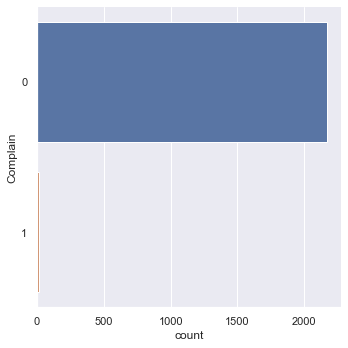

In [8]:
histogramCountOld(customerData,"Complain")

In [9]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           3252 non-null   int64  
 1   Education            3252 non-null   object 
 2   Marital_Status       3252 non-null   object 
 3   Income               3252 non-null   float64
 4   Kidhome              3252 non-null   int64  
 5   Teenhome             3252 non-null   int64  
 6   Recency              3252 non-null   int64  
 7   MntWines             3252 non-null   int64  
 8   MntFruits            3252 non-null   int64  
 9   MntMeatProducts      3252 non-null   int64  
 10  MntFishProducts      3252 non-null   int64  
 11  MntSweetProducts     3252 non-null   int64  
 12  MntGoldProds         3252 non-null   int64  
 13  NumDealsPurchases    3252 non-null   int64  
 14  NumWebPurchases      3252 non-null   int64  
 15  NumCatalogPurchases  3252 non-null   i

In [10]:
y_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Complain  3252 non-null   int64
dtypes: int64(1)
memory usage: 25.5 KB


In [11]:
customerDataRes = pd.concat([X_resampled,y_resampled],axis = 1)
customerDataRes.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase,AcceptedCmp,YearRange,TotalChild,HaveChild,Complain
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,806,25,1,1950,0,0,0
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,9,6,0,1950,2,1,0
2,1965,Graduation,Married,71613.0,0,0,26,426,49,127,...,2,10,4,287,21,0,1960,0,0,0
3,1984,Graduation,Married,26646.0,1,0,26,11,4,20,...,0,4,6,34,8,0,1980,1,1,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,207,19,0,1980,1,1,0


In [12]:
customerDataRes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           3252 non-null   int64  
 1   Education            3252 non-null   object 
 2   Marital_Status       3252 non-null   object 
 3   Income               3252 non-null   float64
 4   Kidhome              3252 non-null   int64  
 5   Teenhome             3252 non-null   int64  
 6   Recency              3252 non-null   int64  
 7   MntWines             3252 non-null   int64  
 8   MntFruits            3252 non-null   int64  
 9   MntMeatProducts      3252 non-null   int64  
 10  MntFishProducts      3252 non-null   int64  
 11  MntSweetProducts     3252 non-null   int64  
 12  MntGoldProds         3252 non-null   int64  
 13  NumDealsPurchases    3252 non-null   int64  
 14  NumWebPurchases      3252 non-null   int64  
 15  NumCatalogPurchases  3252 non-null   i

Number of Complain : 2
0    2168
1    1084
Name: Complain, dtype: int64


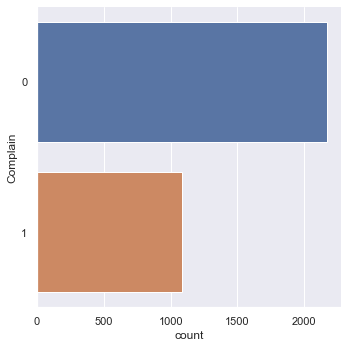

In [13]:
histogramCountOld(customerDataRes,"Complain")

Number of TotalChild : 4
1    1673
0     921
2     605
3      53
Name: TotalChild, dtype: int64


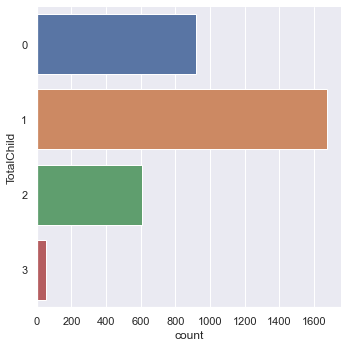

In [14]:
histogramCountOld(customerDataRes,"TotalChild")

Number of TotalChild : 4
1    1111
0     608
2     416
3      53
Name: TotalChild, dtype: int64


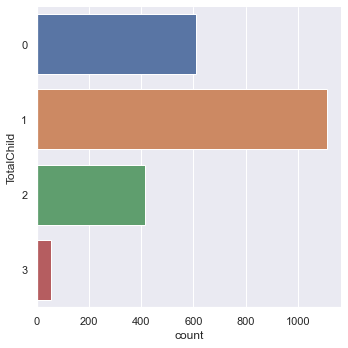

In [15]:
histogramCountOld(customerData,"TotalChild")